In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets

In [3]:
from update_model import ScNN

In [4]:
import math

# Generating Dataset

In [5]:
samples = 100
units = 50

t = np.linspace(np.zeros(samples), np.ones(samples), num=units).T

phi_mars_sun0 = np.random.random(size=(samples,1))
phi_earth_sun0 = np.random.random(size=(samples,1))

phi_mars_sun = 2*np.pi*t + phi_mars_sun0
phi_earth_sun = 2*np.pi*t + phi_earth_sun0

radius_mars = 3
radius_earth = 2

x_mars_sun = radius_mars*np.cos(phi_mars_sun)
y_mars_sun = radius_mars*np.sin(phi_mars_sun)
x_earth_sun = radius_earth*np.cos(phi_earth_sun)
y_earth_sun = radius_earth*np.sin(phi_earth_sun)

In [6]:
phi_mars_earth = np.arctan2(y_mars_sun-y_earth_sun, x_mars_sun-x_earth_sun)
phi_sun_earth = np.arctan2(-y_earth_sun, -x_earth_sun)

phi_mars_earth[phi_mars_earth<0] += np.pi
phi_sun_earth[phi_sun_earth<0] += np.pi

phi_mars_sun = phi_mars_sun%(2*np.pi)
phi_earth_sun = phi_earth_sun%(2*np.pi)

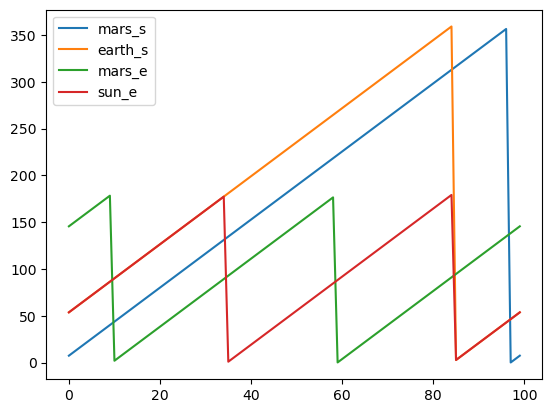

In [13]:
plt.plot(phi_mars_sun*180/np.pi)
plt.plot(phi_earth_sun*180/np.pi)
plt.plot(phi_mars_earth*180/np.pi)
plt.plot(phi_sun_earth*180/np.pi)
plt.legend(['mars_s','earth_s','mars_e','sun_e'])

# Training Model

In [7]:
beta_kl = 5.e-3
beta_rec = 1
heliocentric = ScNN(encoder_layer=[100,100], latent_size=2, decoder_layer=[100,100], output_size=2*units, beta_rec=beta_rec, beta_kl=beta_kl)

In [ ]:
learning_rate = 1e-3
batch_size=500
epochs=50

heliocentric.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate))
combined_input = np.concatenate((phi_mars_sun0, phi_earth_sun0), axis=1)
combined_answer = np.column_stack((phi_mars_earth, phi_sun_earth))
heliocentric.fit({'time_series': combined_input, 'answer': combined_answer}, batch_size=batch_size, epochs=epochs)

# Validating Model